## Figures

In [7]:
#imports
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
from nilearn import image, masking, plotting

In [2]:
def load_file(input_path, dataset_names, flags):
    """
    load hdf5 file 
    """

    f = h5py.File(input_path, 'r')
    data = []

    for (dataset_name, flag) in zip(dataset_names, flags):
        if flag:
            data_tmp = f[dataset_name][()]
        else:
            data_tmp = f[dataset_name][:]
        data.append(data_tmp)
    
    f.close()

    return data

Figure 3

In [ ]:
#panel a

In [9]:
input_data_path = '/Users/amy/Documents/PittCMU/G3/dynamicHR/HumanQA/results_from_hypatia/HumanQA_final_analysis/'
sessions = ["ses-03", "ses-04", "ses-05", "ses-06", "ses-07", "ses-08", "ses-09", \
            "ses-10", "ses-12", "ses-13", "ses-14", "ses-15", "ses-17", "ses-18"]
folder_names = ["rest", "task01", "task02"]

labels = []
for session in sessions:
    for task in folder_names:
        labels.append(session + "_" + task)

#parameters
n_runs = len(sessions) * len(folder_names)
#time_shifts = np.arange(-10,3)
time_shifts = np.arange(-8,3)
time_shifts_sec = time_shifts * 1.5
time_shifts_sec_flipped = time_shifts_sec * (-1)
n_time_shifts = len(time_shifts)

columns = []
cv_corrs = np.zeros((n_time_shifts, n_runs))
raw_cv_corrs = np.zeros((n_time_shifts, n_runs))

#load data
for (i, time_shift) in zip(range(n_time_shifts), time_shifts):
        
    folder = "time" + str(time_shift)
    columns.append(folder)

    cv_file = 'var_mask02_modular_cj_cv_r_p_r2_rmse.pckl'
    cv_path = os.path.join(input_data_path, folder, cv_file)
    f = open(cv_path, 'rb')
    [cv_r, cv_p, cv_r2, cv_rmse] = pickle.load(f) 
    f.close()
    cv_corrs[i,:] = cv_r
    raw_cv_file = 'raw_mask02_modular_cj_cv_r_p_r2_rmse.pckl'
    raw_cv_path = os.path.join(input_data_path, "raw", folder, raw_cv_file)
    f = open(raw_cv_path, 'rb')
    [raw_cv_r, raw_cv_p, raw_cv_r2, raw_cv_rmse] = pickle.load(f) 
    f.close()
    raw_cv_corrs[i,:] = raw_cv_r
    

labels_all = labels.copy()
labels_all.extend(['lag shift (s)'])

In [10]:
all_corrs = np.concatenate((cv_corrs, time_shifts_sec_flipped.reshape((-1,1))), axis=1)
all_corrs_df = pd.DataFrame(all_corrs, columns=labels_all)
all_corrs2_df = all_corrs_df.melt(id_vars = ['lag shift (s)'], value_vars=labels)
all_corrs2_df['model run'] = "clean"

raw_all_corrs = np.concatenate((raw_cv_corrs, time_shifts_sec_flipped.reshape((-1,1))), axis=1)
raw_all_corrs_df = pd.DataFrame(raw_all_corrs, columns=labels_all)
raw_all_corrs2_df = raw_all_corrs_df.melt(id_vars = ['lag shift (s)'], value_vars=labels)
raw_all_corrs2_df['model run'] = "raw"

combined_all_corrs_df = pd.concat([all_corrs2_df, raw_all_corrs2_df], axis=0)

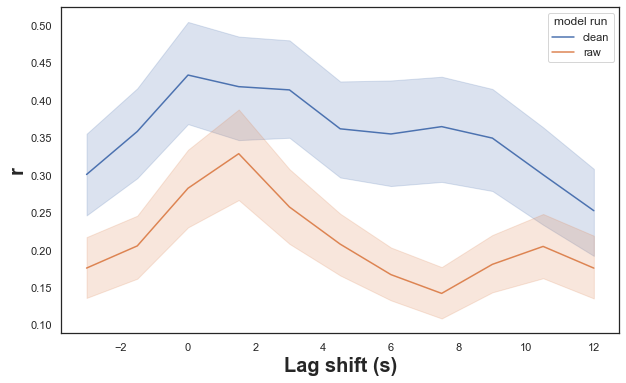

In [11]:
sns.set_theme(style='white')

fig, ax = plt.subplots(figsize=(10,6)) 

sns.lineplot(data=combined_all_corrs_df, x='lag shift (s)', y='value', errorbar=('ci', 95), n_boot=1000, hue='model run')
ax.set_ylabel(r'r', size=20, weight = 'bold')
ax.set_xlabel(r'Lag shift (s)', size=20, weight = 'bold')

plt.show()

In [ ]:
#panel b

In [5]:
input_data_path = "/Users/amy/Documents/PittCMU/G3/dynamicHR/NSD/"
filename = "subj03-session24-run12_var_y_predicted_test_MNI_time6.hdf5"

[y, y_pred] = load_file(input_data_path + filename, ['y', 'y_predicted'], [False, False])

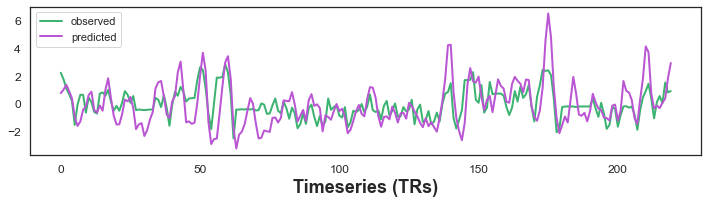

In [8]:
sns.set_theme(style='white')

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(y, linewidth=2, color='mediumseagreen')
ax.plot(y_pred, linewidth=2, color='mediumorchid')
#ax.axis('off')
ax.legend(['observed', 'predicted'])
ax.set_xlabel(r'Timeseries (TRs)', size=18, weight = 'bold')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
plt.tight_layout()
plt.show()


Figure 4

In [ ]:
#panel a

In [12]:
data_path = "/Users/amy/Documents/PittCMU/G3/dynamicHR/NSD/"

subjects = ["subj06", "subj01", "subj07", "subj02", "subj08", "subj04", "subj05", "subj03"]
subject_labels = ["S6", "S1", "S7", "S2", "S8", "S4", "S5", "S3"]

#parameters
n_trs = 226
time_shifts = np.arange(-2,11)
n_time_shifts = len(time_shifts)
time_shifts_sec = time_shifts * 1.33171

final_corrs_df = pd.DataFrame()

for (subj, subj_label) in zip(subjects, subject_labels):

    subj_file_path = "/Users/amy/Documents/PittCMU/G3/dynamicHR/NSD/" + subj + "-session-run_list.txt"
    subj_list = pd.read_csv(subj_file_path, header=None).squeeze("columns")
    str_subj_list = subj_list.tolist()

    labels = str_subj_list.copy()
    labels.extend(["lag shift (s)"])

    all_cv_filepath = os.path.join(data_path, subj +  "_var_cv_r_r2_rmse_all_times_v2.hdf5")
    [corrs, r2s, rmses] = load_file(all_cv_filepath, ['corrs', 'r2s', 'rmses'], [False, False, False])

    all_corrs = np.concatenate((corrs, time_shifts_sec.reshape((-1,1))), axis=1)
    all_corrs_df = pd.DataFrame(all_corrs, columns=labels)
    all_corrs2_df = all_corrs_df.melt(id_vars = ['lag shift (s)'], value_vars=str_subj_list)
    #all_corrs2_df['subject'] = subj
    all_corrs2_df['participant'] = subj_label
    final_corrs_df = pd.concat([final_corrs_df, all_corrs2_df], axis=0, ignore_index=True)


In [13]:
grey1 = sns.color_palette('Greys')[1] #subj01
blue = sns.color_palette()[0] #subj02
orange = sns.color_palette()[1] #subj03
green = sns.color_palette()[2] #subj04
red = sns.color_palette()[3] #subj05
grey2 = sns.color_palette('Greys')[3] #subj06
grey3 = sns.color_palette('Greys')[5] #subj07
purple = sns.color_palette()[4] #subj08
#clr_palette = [grey1, blue, orange, green, red, grey2, grey3, purple]
clr_palette = [grey2, grey1, grey3, blue, purple, green, red, orange]

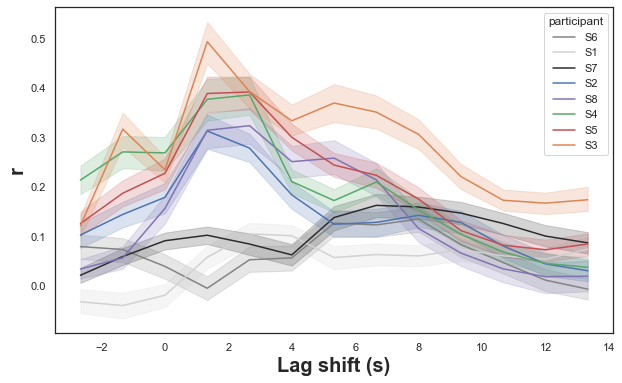

In [14]:
sns.set_theme(style='white')

fig, ax = plt.subplots(figsize=(10,6)) 
sns.lineplot(data=final_corrs_df, x='lag shift (s)', y='value', errorbar=('ci', 95), n_boot=1000, hue='participant', palette=clr_palette)
ax.set_ylabel(r'r', size=20, weight = 'bold')
ax.set_xlabel(r'Lag shift (s)', size=20, weight = 'bold')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.show()

In [ ]:
#panel b

In [15]:
final_corrs_df2 = final_corrs_df.loc[final_corrs_df["lag shift (s)"] == 1.33171]

/var/folders/sj/v1s3b78s07z2w0md4brp2kmm0000gn/T/ipykernel_33318/286196189.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y='value',


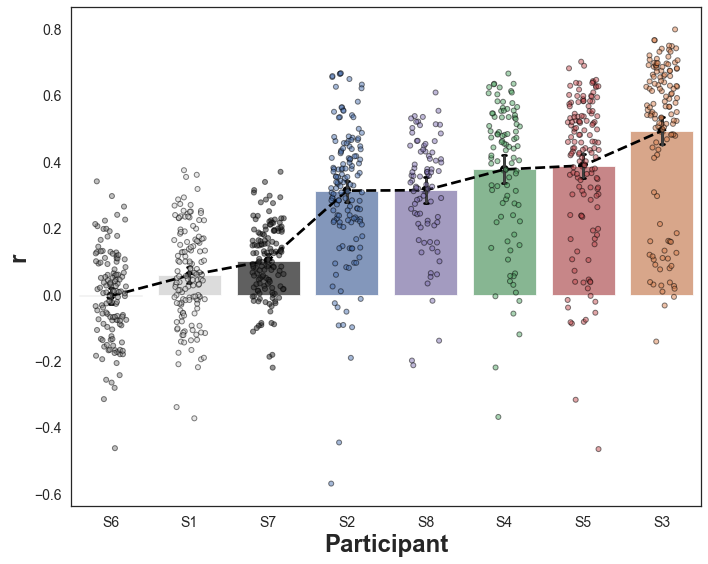

In [16]:
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(10,8))

sns.pointplot(y='value', 
              x='participant', 
              data=final_corrs_df2, 
              estimator = np.mean, 
              seed = 0, 
              color='black',
              capsize=.05,
              linestyles='--',
              ax=ax)

sns.stripplot(y='value', 
              x='participant', 
              data=final_corrs_df2, 
              size= 5,
              alpha=0.5,
              jitter=0.2,
              linewidth = 1,
              #color = 'white',
              edgecolor ='black',
              palette = clr_palette,
              ax = ax)

sns.barplot(y='value', 
            x='participant', 
            data=final_corrs_df2, 
            estimator = np.mean,
            alpha=0.75,
            palette = clr_palette,
            ax = ax)

ax.set_ylabel(r'r', size=24, weight = 'bold')
ax.set_xlabel(r'Participant', size=24, weight = 'bold')

ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.tight_layout()
plt.show()

Figure 5

In [ ]:
#panel a

In [17]:
input_data_path = "/Users/amy/Documents/PittCMU/G3/dynamicHR/NSD/group/"

subjects = ["subj01", "subj02", "subj03", "subj04", "subj05", "subj06", "subj07", "subj08"]

all_mni_r = []
all_mni_r2 = []

all_r = []
all_r2 = []

train_subj = []
test_subj = []
ave_r = []
ave_r2 = []
analysis = []
outliers = []

for subj in subjects:

    filename = subj + "_var_cv_r_p_r2_rmse_MNI_time6.hdf5"

    [r, r2] = load_file(input_data_path + filename, ['corr', 'r2'], [False, False])
    all_mni_r.append(r)
    all_mni_r2.append(r2)

    ave_r.append(np.mean(r))
    ave_r2.append(np.mean(r2))
    train_subj.append(subj)
    test_subj.append(subj)
    analysis.append("within")

    if subj in ['subj01', 'subj06', 'subj07']:
        outliers.append("yes")
    else:
        outliers.append("no")

    subjects2 = subjects.copy()
    subjects2.remove(subj)

    for subj2 in subjects2:

        filename2 = "train-" + subj + "_test-" + subj2 + "_var_cv_r_p_r2_rmse_time6.hdf5"

        [r, r2] = load_file(input_data_path + filename2, ['corr', 'r2'], [False, False])
        all_r.append(r)
        all_r2.append(r2)

        ave_r.append(np.mean(r))
        ave_r2.append(np.mean(r2))
        train_subj.append(subj)
        test_subj.append(subj2)
        analysis.append("between")

        if subj in ['subj01', 'subj06', 'subj07']:
            outliers.append("yes")
        elif subj2 in ['subj01', 'subj06', 'subj07']:
            outliers.append("yes")
        else:
            outliers.append("no")

In [18]:
all_group_df = pd.DataFrame({'train_subj':train_subj, 'test_subj':test_subj, 'ave_r':ave_r, 'ave_r2':ave_r2, 'analysis':analysis, 'outlier':outliers})
all_group_df_r_pivot = all_group_df.pivot("train_subj", "test_subj", "ave_r")
all_group_df_r_pivot2 = all_group_df_r_pivot.reindex(['subj02', 'subj03', 'subj04', 'subj05', 'subj08', 'subj01', 'subj06', 'subj07'])
all_group_df_r_pivot3 = all_group_df_r_pivot2[['subj02', 'subj03', 'subj04', 'subj05', 'subj08', 'subj01', 'subj06', 'subj07']]
all_group_df_r_pivot4 = all_group_df_r_pivot3.rename(columns={'subj02':"S2", 'subj03':"S3", 'subj04':"S4", 'subj05':"S5", 'subj08':"S8", 'subj01':"S1", 'subj06':"S6", 'subj07':"S7"})
all_group_df_r_pivot5 = all_group_df_r_pivot4.rename(index={'subj02':"S2", 'subj03':"S3", 'subj04':"S4", 'subj05':"S5", 'subj08':"S8", 'subj01':"S1", 'subj06':"S6", 'subj07':"S7"})


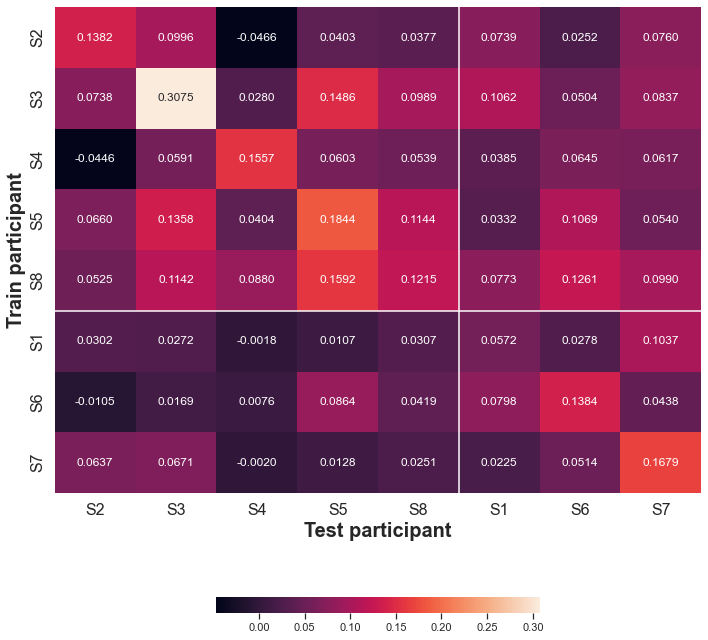

In [19]:

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(all_group_df_r_pivot5, annot=True, fmt=".4f", 
                 cbar_kws={"shrink": 0.5, "location":'bottom'})
ax.set_ylabel(r'Train participant', size=20, weight = 'bold')
ax.set_xlabel(r'Test participant', size=20, weight = 'bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

ax.hlines([5], colors=['white'], *ax.get_xlim())
ax.vlines([5], colors=['white'], *ax.get_ylim())

plt.tight_layout()
plt.show()


In [ ]:
#panel b

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:white'` for same effect.
  warnings.warn(msg, FutureWarning)


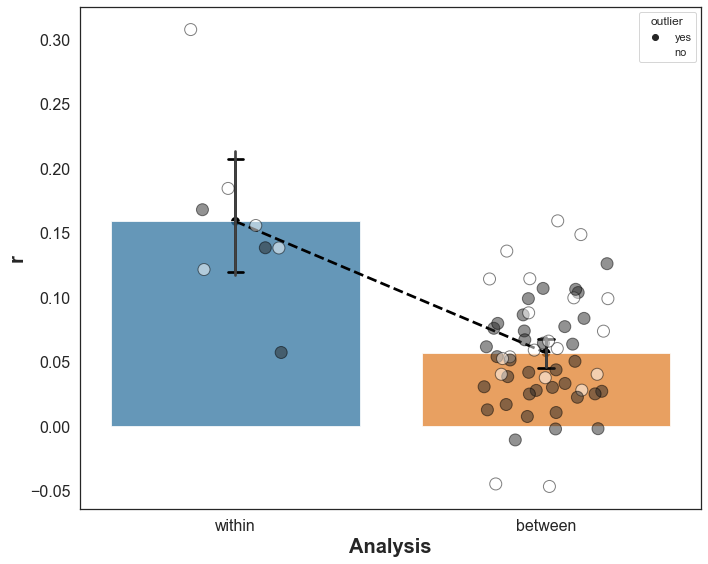

In [20]:
sns.set_theme(style='white')
clr_palette = sns.color_palette("tab10")

fig, ax = plt.subplots(figsize=(10,8))

sns.stripplot(y='ave_r', 
              x='analysis', 
              data=all_group_df, 
              hue='outlier',
              size= 12,
              alpha=0.5,
              jitter=0.2,
              linewidth = 1,
              color = 'white',
              edgecolor ='black',
              ax = ax)

sns.pointplot(y='ave_r', 
              x='analysis', 
              data=all_group_df, 
              estimator = np.mean, 
              seed = 0, 
              color='black',
              capsize=.05,
              linestyles='--',
              ax=ax)

sns.barplot(y='ave_r', 
            x='analysis', 
            data=all_group_df, 
            estimator = np.mean,
            alpha=0.75,
            palette = clr_palette,
            ax = ax)

ax.set_ylabel(r'r', size=20, weight = 'bold')
ax.set_xlabel(r'Analysis', size=20, weight = 'bold')

ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#panel c

In [22]:
input_data_path = "/Users/amy/Documents/PittCMU/G3/dynamicHR/NSD/"

subjects = ["subj01", "subj02", "subj03", "subj04", "subj05", "subj06", "subj07", "subj08"]

n_features = 1271436
ave_lasso_betas = np.zeros((len(subjects), n_features))

for i, subj in enumerate(subjects):

    file = subj + "_var_average_lasso_betas_union_MNI_time6.hdf5"
    [lasso_betas] = load_file(input_data_path + file, ['ave_lasso_betas'], [False])
    ave_lasso_betas[i,:] = lasso_betas

input_data_path2 = "/Users/amy/Documents/PittCMU/G3/dynamicHR/NSD/group/"

subject1 = []
subject2 = []
distance = []
ave_r = []
outlier = []

for i, subj in enumerate(subjects):

    #print(i, subj)
    
    subjects2 = subjects.copy()
    subjects2.remove(subj)

    for subj2 in subjects2:

        j = subjects.index(subj2)

        #print(j, subj2)

        subject1.append(subj)
        subject2.append(subj2)

        if subj in ['subj01', 'subj06', 'subj07']:
            outlier.append("yes")
        elif subj2 in ['subj01', 'subj06', 'subj07']:
            outlier.append("yes")
        else:
            outlier.append("no")

        map1 = ave_lasso_betas[i,:]
        map2 = ave_lasso_betas[j,:]
        
        dist = np.linalg.norm(map1-map2)
        distance.append(dist)

        filename2 = "train-" + subj + "_test-" + subj2 + "_var_cv_r_p_r2_rmse_time6.hdf5"
        [r] = load_file(input_data_path2 + filename2, ['corr'], [False])
        ave_r.append(np.mean(r))

        
distance_df = pd.DataFrame({'subject1':subject1, 'subject2':subject2, 'distance':distance, 'ave_r':ave_r, 'outlier':outlier})


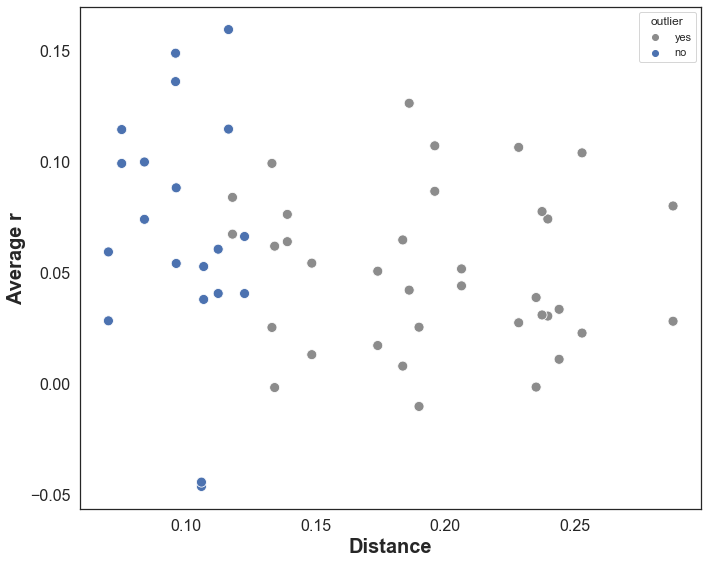

In [23]:
blue = sns.color_palette()[0]
grey = sns.color_palette()[7]
clr_palette = [grey,blue]

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(data=distance_df,x='distance', y='ave_r', hue='outlier', palette=clr_palette, s=100)
ax.set_ylabel(r'Average r', size=20, weight = 'bold')
ax.set_xlabel(r'Distance', size=20, weight = 'bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
plt.tight_layout()
plt.show()


Figure 6

In [24]:
input_data_path = "/Users/amy/Documents/PittCMU/G3/dynamicHR/NSD/group/"
filename = "train-NSDave_test-QA_var_cv_r_p_r2_rmse_time5.hdf5"
[r, r2] = load_file(input_data_path + filename, ['corr', 'r2'], [False, False])

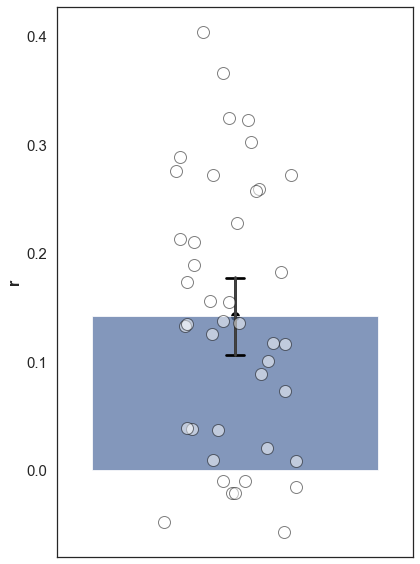

In [25]:
fig, ax = plt.subplots(figsize=(6,8))

sns.stripplot(y=r, 
              size= 12,
              alpha=0.5,
              jitter=0.2,
              linewidth = 1,
              color = 'white',
              edgecolor ='black',
              ax = ax)

sns.pointplot(y=r, 
              estimator = np.mean, 
              seed = 0, 
              color='black',
              capsize=.05,
              linestyles='--',
              ax=ax)

sns.barplot(y=r, 
            estimator = np.mean,
            alpha=0.75,
            ax = ax)

ax.set_ylabel(r'r', size=16, weight = 'bold')

ax.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.show()